<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/donnees_manquantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('/content/drive/MyDrive/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/09-Feature-Engineering/Datasets/Ames_Housing_Feature_Description.txt', 'r') as f:
  print(f.read())

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/09-Feature-Engineering/Datasets/Ames_outliers_removed.csv")

In [ ]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
# supprimons les PID qui ne servent absoluent a rien pour le train de non ML car il ya deja des index
# si on veut garder  le PID, on doit l'utilise comme index
df.drop("PID", axis=1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
# cherchons le % des donnees manquantes de chq feature
100 * df.isnull().sum() / len(df)

PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

In [ ]:
# creons une fonction qui va nous faire ca
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values()
  return percent_nan

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

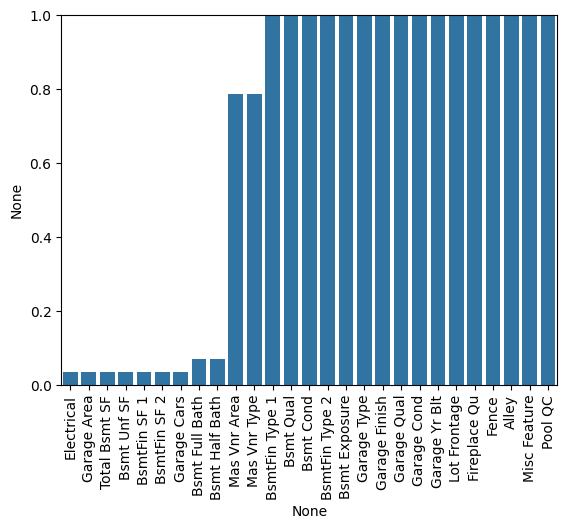

In [ ]:
# visualisons cela
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90) ;# pour faire pivoter chq nom de featre de 90 degre
plt.ylim(0,1) # on delimmite pour voir

In [ ]:
# on filtre les donnees dont le % < 1
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [ ]:
# explorons quel % reel represente 0.034165
100 / len(df)
# le resultat btenu est identique a 0.034165
# ce qui nous apprend que seulement une ligne a des infos manquantes  pour la feature Electrical

0.0341646737273659

In [ ]:
# ou prour trouver le nombre de ligne faire
(0.034165 / 100 ) * len(df)

1.00000955

In [ ]:
# explorons une ligne possedant des valeurs manquantes
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
# consider les lignes ou il des valeurs manquantes
df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [ ]:
# % des valeur manquantes
percent_nan = percent_missing(df)

In [ ]:
percent_nan[percent_nan < 1]

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

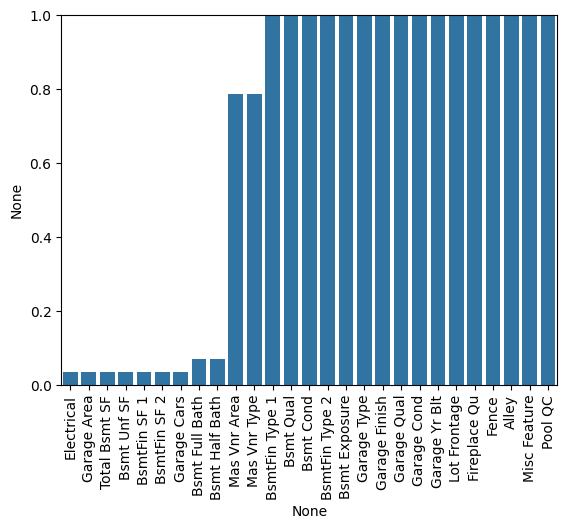

In [ ]:
# visualisons cela
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90) ;# pour faire pivoter chq nom de featre de 90 degre
plt.ylim(0,1) # on delimmite pour voir

In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
# colonnes numerique de BSMT ---> completer par  0 avec fillna
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2',   'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# colonnes string de BSMT
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond',   'Bsmt Exposure',  'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
percent_nan = percent_missing(df)

(0.0, 1.0)

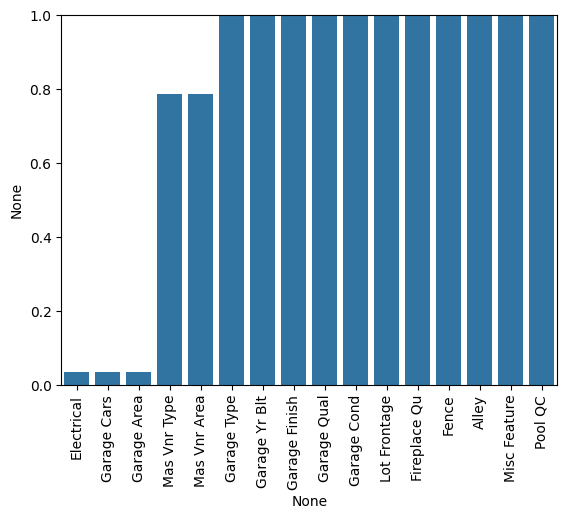

In [ ]:
# visualisons cela
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90) ;# pour faire pivoter chq nom de featre de 90 degre
plt.ylim(0,1) # on delimmite pour voir

In [ ]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

(0.0, 1.0)

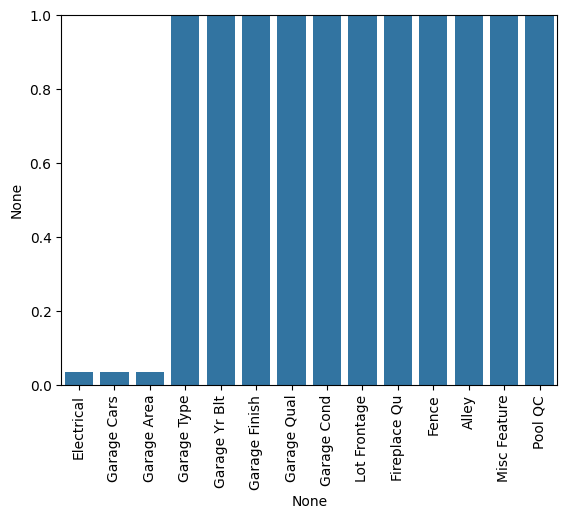

In [ ]:
# visualisons cela
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90) ;# pour faire pivoter chq nom de featre de 90 degre
plt.ylim(0,1) # on delimmite pour voir